In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
file_path = 'x'
df = pd.read_csv(file_path)
import warnings

warnings.filterwarnings('ignore')
sns.set_style()

In [2]:
df['transmission'] = df['transmission'].str.replace('Sedan', 'sedan')

In [3]:
df['transmission'].fillna('automatic', inplace=True)

In [4]:
df=df.dropna()

In [5]:
df.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [6]:
# condition veri setinde nümerik bir değer gibi gözükse de aslında 1 den 50ye kadar aracın -
#fiziksel durumunu gösteren kategorik bir değişken öncelikle bunu düzeltmemiz gerekiyor
# DataFrame oluşturma
df_condition = pd.DataFrame(df['condition'])

# Kategorilere ayırma
def categorize_condition(value):
    if 1 <= value <= 10:
        return 'Çok Kötü'
    elif 11 <= value <= 20:
        return 'Kötü'
    elif 21 <= value <= 30:
        return 'Orta'
    elif 31 <= value <= 40:
        return 'İyi'
    elif 41 <= value <= 49:
        return 'Mükemmel'

# Yeni kategori sütunu ekleyelim
df_condition['category'] = df_condition['condition'].apply(categorize_condition)

df_condition.drop('condition',axis=1,inplace=True)
df.drop('condition',axis=1,inplace=True)
df['category']=df_condition['category']
df.rename(columns={'category': 'condition_categoric'}, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 533648 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 533648 non-null  int64  
 1   make                 533648 non-null  object 
 2   model                533648 non-null  object 
 3   trim                 533648 non-null  object 
 4   body                 533648 non-null  object 
 5   transmission         533648 non-null  object 
 6   vin                  533648 non-null  object 
 7   state                533648 non-null  object 
 8   odometer             533648 non-null  float64
 9   color                533648 non-null  object 
 10  interior             533648 non-null  object 
 11  seller               533648 non-null  object 
 12  mmr                  533648 non-null  float64
 13  sellingprice         533648 non-null  float64
 14  saledate             533648 non-null  object 
 15  condition_categoric  5

### Korelasyonlar 

In [9]:
# Sayısal sütunları seçme
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.difference(['year'])

# Korelasyon matrisini hesaplama
correlation_matrix = df[numeric_columns].corr()

# Korelasyon matrisini yazdırma
print(correlation_matrix)

                   mmr  odometer  sellingprice
mmr           1.000000 -0.581737      0.983677
odometer     -0.581737  1.000000     -0.576545
sellingprice  0.983677 -0.576545      1.000000


In [10]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.difference(['year'])

# 'numeric_columns' içinde belirtilen sütunları seçerek yeni bir DataFrame oluşturun
numeric_df = df[numeric_columns]

# Korelasyon matrisini hesapla
correlation_matrix = numeric_df.corr()

# Korelasyon matrisinden belirli satırları seç
selected_correlation = correlation_matrix.iloc[-1:]

# Seçilen satıra stil ekleyerek görselleştirme
styled_correlation = selected_correlation.style.background_gradient(cmap='coolwarm', axis=1)

# Sonuçları gösterme
styled_correlation

,mmr,odometer,sellingprice
sellingprice,0.983677,-0.576545,1.000000


Yapabileceğimiz en düzgün çıkarım aracın minimum piyasa değeri ile satış değeri arasında çok ciddi bir korelasyon var insanlar genelde piysa fiyatının altına satış yapmıyorlar

In [12]:
import pandas as pd
from scipy.stats import pearsonr

# Sayısal sütunları seç
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.difference(['year'])

# 'numeric_columns' içinde belirtilen sütunları seçerek yeni bir DataFrame oluşturun
numeric_df = df[numeric_columns]

# Korelasyon matrisini hesapla
correlation_matrix = numeric_df.corr()

# Korelasyon matrisinden 'sellingprice' ile diğer değişkenler arasındaki korelasyonu alalım
sellingprice_correlation = correlation_matrix['sellingprice'].drop('sellingprice')

# Sonuçları saklamak için bir liste oluşturuyoruz
results = []

# İstatistiksel anlamlılık için Pearson korelasyon testini uygulayalım
for column in sellingprice_correlation.index:
    corr, p_value = pearsonr(df['sellingprice'], df[column])
    
    # Sonuçları listeye ekle
    results.append({
        'Değişken': column,
        'Korelasyon': f"{corr:.3f}",
        'p-değeri': f"{p_value:.3f}",
        'Anlamlılık': 'Evet' if p_value < 0.05 else 'Hayır'
    })

# Sonuçları bir DataFrame'e dönüştür
results_df = pd.DataFrame(results)

# Sonuçları yazdır
print(results_df)

# Alternatif olarak tabloyu daha estetik bir şekilde göstermek için:
# results_df.style.set_table_styles([{'selector': 'thead th', 'props': [('background-color', 'lightblue')]}])


   Değişken Korelasyon p-değeri Anlamlılık
0       mmr      0.984    0.000       Evet
1  odometer     -0.577    0.000       Evet


In [13]:
import pandas as pd
from scipy.stats import pearsonr

# Sayısal sütunları seç
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.difference(['year'])

# 'numeric_columns' içinde belirtilen sütunları seçerek yeni bir DataFrame oluşturun
numeric_df = df[numeric_columns]

# Korelasyon matrisini hesapla
correlation_matrix = numeric_df.corr()

# Korelasyon matrisinden 'sellingprice' ile diğer değişkenler arasındaki korelasyonu alalım
sellingprice_correlation = correlation_matrix['sellingprice'].drop('sellingprice')

# Sonuçları saklamak için bir liste oluşturuyoruz
results = []

# İstatistiksel anlamlılık için Pearson korelasyon testini uygulayalım
for column in sellingprice_correlation.index:
    corr, p_value = pearsonr(df['sellingprice'], df[column])
    
    # Sonuçları listeye ekle
    results.append({
        'Değişken': column,
        'Korelasyon Katsayısı': f"{corr:.3f}",
        'p-değeri': f"{p_value:.3f}",
        'Anlamlılık': 'Evet' if p_value < 0.05 else 'Hayır'
    })

# Sonuçları bir DataFrame'e dönüştür
results_df = pd.DataFrame(results)

# Estetik stil ayarları
styled_df = results_df.style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', 'lightblue'), ('font-weight', 'bold')]},  # Başlıkları vurgula
    {'selector': 'tbody td', 'props': [('background-color', '#f5f5f5')]},  # Satır arka planı
    {'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#e9f7fb')]},  # Tek satırlara renk ekle
    {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#ffffff')]},  # Çift satırlara renk ekle
])

# Sonuçları yazdır ve estetik görselleştirme
styled_df


,Değişken,Korelasyon Katsayısı,p-değeri,Anlamlılık
0,mmr,0.984,0.000,Evet
1,odometer,-0.577,0.000,Evet


In [14]:
# İstatistiksel anlamlılık için Pearson korelasyon testini uygulayalım
for column in sellingprice_correlation.index:
    corr, p_value = pearsonr(df['sellingprice'], df[column])
    print(f"Değişken: {column} | Korelasyon: {corr:.3f} | p-değeri: {p_value:.3f}")

    # Korelasyonun istatistiksel olarak anlamlı olup olmadığını kontrol et
    if p_value < 0.05:
        print(f"Değişken {column} ile 'sellingprice' arasındaki korelasyon istatistiksel olarak anlamlıdır.")
    else:
        print(f"Değişken {column} ile 'sellingprice' arasındaki korelasyon istatistiksel olarak anlamlı değildir.")


Değişken: mmr | Korelasyon: 0.984 | p-değeri: 0.000
Değişken mmr ile 'sellingprice' arasındaki korelasyon istatistiksel olarak anlamlıdır.
Değişken: odometer | Korelasyon: -0.577 | p-değeri: 0.000
Değişken odometer ile 'sellingprice' arasındaki korelasyon istatistiksel olarak anlamlıdır.


In [15]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Sayısal sütunları seç (sellingprice ve year hariç)
numeric_columns = df.select_dtypes(include=['float64', 'int64'])  # Sayısal sütunları seç
numeric_columns = numeric_columns.drop(columns=['sellingprice', 'year'])  # 'sellingprice' ve 'year' sütunlarını çıkar

# Sabit terimi (intercept) ekleyelim
X = add_constant(numeric_columns)

# VIF hesaplaması
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


print(vif_data)

   Variable       VIF
0     const  9.931237
1  odometer  1.511529
2       mmr  1.511529


In [16]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Sayısal sütunları seç (sellingprice hariç)
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
numeric_columns = numeric_columns.drop(columns=['sellingprice', 'year'])  # 'sellingprice' ve 'year' sütunlarını çıkar

# VIF hesaplaması (sabit terim eklemeden)
vif_data = pd.DataFrame()
vif_data['Variable'] = numeric_columns.columns
vif_data['VIF'] = [variance_inflation_factor(numeric_columns.values, i) for i in range(numeric_columns.shape[1])]


print(vif_data)


   Variable       VIF
0  odometer  1.247378
1       mmr  1.247378


In [17]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Sayısal sütunları seç (sellingprice hariç)
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
numeric_columns = numeric_columns.drop(columns=['sellingprice', 'year'])  # 'sellingprice' ve 'year' sütunlarını çıkar

# VIF hesaplaması (sabit terim eklemeden)
vif_data = pd.DataFrame()
vif_data['Variable'] = numeric_columns.columns
vif_data['VIF'] = [variance_inflation_factor(numeric_columns.values, i) for i in range(numeric_columns.shape[1])]

# Tabloyu estetik hale getirmek için stil uygulaması
styled_vif_data = vif_data.style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', 'lightblue'), ('font-weight', 'bold')]},  # Başlıkları vurgula
    {'selector': 'tbody td', 'props': [('background-color', '#f5f5f5')]},  # Satır arka planı
    {'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#e9f7fb')]},  # Tek satırlara renk ekle
    {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#ffffff')]},  # Çift satırlara renk ekle
    {'selector': 'tbody td:nth-child(2)', 'props': [('text-align', 'center')]},  # VIF sütununu ortala
])

# Sonuçları yazdır ve estetik görselleştirme
styled_vif_data


,Variable,VIF
0,odometer,1.247378
1,mmr,1.247378


### Normallik, Çarpıklık ,Basıklık 

- Shapiro-Wilks testi

In [20]:
from scipy import stats

# Shapiro-Wilk testi (sellingprice sütunu)
statistic, p_value = stats.shapiro(df['sellingprice'])

# Sonuçları yazdırma
print(f"Test İstatistiği: {statistic}")
print(f"P Değeri: {p_value}")

# P-değerine göre karar verme:
alpha = 0.05  # %5 anlamlılık seviyesi
if p_value > alpha:
    print("Veri normal dağılıyor gibi görünüyor (H0 kabul edilir).")
else:
    print("Veri normal dağılmıyor (H0 reddedilir).")

Test İstatistiği: 0.8884716629981995
P Değeri: 0.0
Veri normal dağılmıyor (H0 reddedilir).


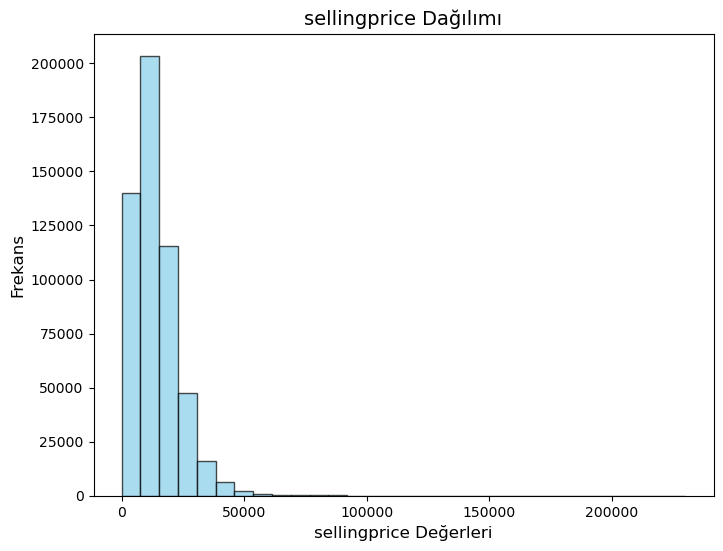

In [21]:
import matplotlib.pyplot as plt

# mmr sütunu için histogram çiz
plt.figure(figsize=(8, 6))
plt.hist(df['sellingprice'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Başlık ve etiketler
plt.title('sellingprice Dağılımı', fontsize=14)
plt.xlabel('sellingprice Değerleri', fontsize=12)
plt.ylabel('Frekans', fontsize=12)

# Göster
plt.show()


In [22]:
# Çarpıklık (skewness) ve Basıklık (kurtosis) hesaplama
skewness = df['sellingprice'].skew()
kurtosis = df['sellingprice'].kurt()

# Çarpıklık Derecesi
if skewness > 2:
    skewness_degree = "Şiddetli sağa çarpık"
elif skewness > 1:
    skewness_degree = "Orta derecede sağa çarpık"
elif skewness > 0:
    skewness_degree = "Hafif sağa çarpık"
elif skewness < -2:
    skewness_degree = "Şiddetli sola çarpık"
elif skewness < -1:
    skewness_degree = "Orta derecede sola çarpık"
elif skewness < 0:
    skewness_degree = "Hafif sola çarpık"
else:
    skewness_degree = "Simetrik (normal dağılıma yakın)"

# Basıklık Derecesi
if kurtosis > 3:
    kurtosis_degree = "Aşırı sivri (çok basık)"
elif kurtosis == 3:
    kurtosis_degree = "Normal dağılıma yakın (kurtosis = 3)"
else:
    kurtosis_degree = "Düz (basık değil)"

# Sonuçları yazdırma
print(f"Çarpıklık (Skewness): {skewness:.3f} - {skewness_degree}")
print(f"Basıklık (Kurtosis): {kurtosis:.3f} - {kurtosis_degree}")


Çarpıklık (Skewness): 1.950 - Orta derecede sağa çarpık
Basıklık (Kurtosis): 11.359 - Aşırı sivri (çok basık)


In [23]:
from scipy import stats

# Shapiro-Wilk testi (sellingprice sütunu)
statistic, p_value = stats.shapiro(df['odometer'])

# Sonuçları yazdırma
print(f"Test İstatistiği: {statistic}")
print(f"P Değeri: {p_value}")

# P-değerine göre karar verme:
alpha = 0.05  # %5 anlamlılık seviyesi
if p_value > alpha:
    print("Veri normal dağılıyor gibi görünüyor (H0 kabul edilir).")
else:
    print("Veri normal dağılmıyor (H0 reddedilir).")

Test İstatistiği: 0.869259238243103
P Değeri: 0.0
Veri normal dağılmıyor (H0 reddedilir).


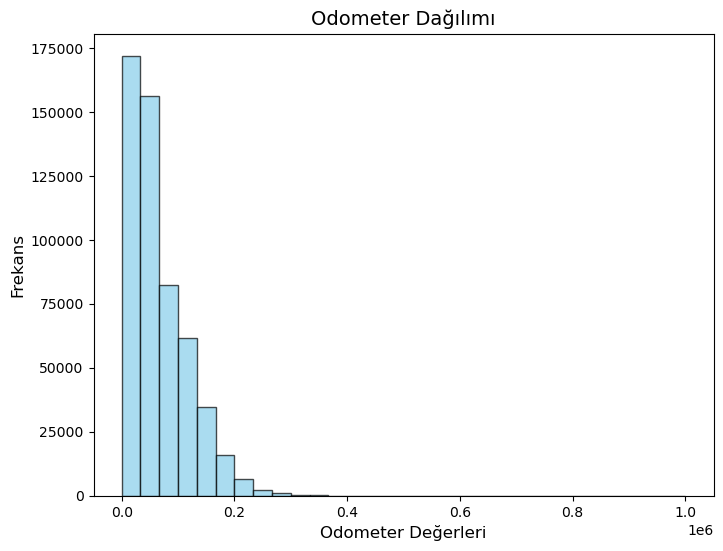

In [24]:
import matplotlib.pyplot as plt

# mmr sütunu için histogram çiz
plt.figure(figsize=(8, 6))
plt.hist(df['odometer'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Başlık ve etiketler
plt.title('Odometer Dağılımı', fontsize=14)
plt.xlabel('Odometer Değerleri', fontsize=12)
plt.ylabel('Frekans', fontsize=12)

# Göster
plt.show()


In [25]:
# Çarpıklık (skewness) ve Basıklık (kurtosis) hesaplama
skewness = df['odometer'].skew()
kurtosis = df['odometer'].kurt()

# Çarpıklık Derecesi
if skewness > 2:
    skewness_degree = "Şiddetli sağa çarpık"
elif skewness > 1:
    skewness_degree = "Orta derecede sağa çarpık"
elif skewness > 0:
    skewness_degree = "Hafif sağa çarpık"
elif skewness < -2:
    skewness_degree = "Şiddetli sola çarpık"
elif skewness < -1:
    skewness_degree = "Orta derecede sola çarpık"
elif skewness < 0:
    skewness_degree = "Hafif sola çarpık"
else:
    skewness_degree = "Simetrik (normal dağılıma yakın)"

# Basıklık Derecesi
if kurtosis > 3:
    kurtosis_degree = "Aşırı sivri (çok basık)"
elif kurtosis == 3:
    kurtosis_degree = "Normal dağılıma yakın (kurtosis = 3)"
else:
    kurtosis_degree = "Düz (basık değil)"

# Sonuçları yazdırma
print(f"Çarpıklık (Skewness): {skewness:.3f} - {skewness_degree}")
print(f"Basıklık (Kurtosis): {kurtosis:.3f} - {kurtosis_degree}")


Çarpıklık (Skewness): 1.908 - Orta derecede sağa çarpık
Basıklık (Kurtosis): 14.403 - Aşırı sivri (çok basık)


In [26]:
from scipy import stats


# Shapiro-Wilk testi (sellingprice sütunu)
statistic, p_value = stats.shapiro(df['mmr'])

# Sonuçları yazdırma
print(f"Test İstatistiği: {statistic}")
print(f"P Değeri: {p_value}")

# P-değerine göre karar verme:
alpha = 0.05  # %5 anlamlılık seviyesi
if p_value > alpha:
    print("Veri normal dağılıyor gibi görünüyor (H0 kabul edilir).")
else:
    print("Veri normal dağılmıyor (H0 reddedilir).")

Test İstatistiği: 0.8842412233352661
P Değeri: 0.0
Veri normal dağılmıyor (H0 reddedilir).


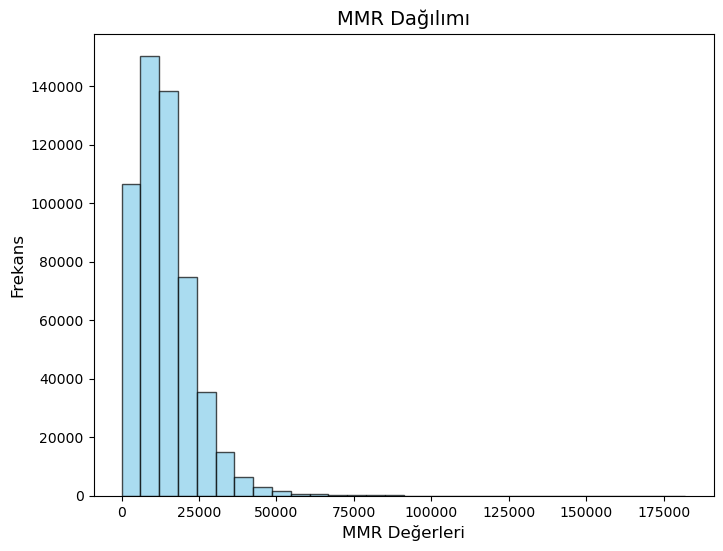

In [27]:
import matplotlib.pyplot as plt

# mmr sütunu için histogram çiz
plt.figure(figsize=(8, 6))
plt.hist(df['mmr'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Başlık ve etiketler
plt.title('MMR Dağılımı', fontsize=14)
plt.xlabel('MMR Değerleri', fontsize=12)
plt.ylabel('Frekans', fontsize=12)

# Göster
plt.show()


In [28]:
# Çarpıklık (skewness) ve Basıklık (kurtosis) hesaplama
skewness = df['mmr'].skew()
kurtosis = df['mmr'].kurt()

# Çarpıklık Derecesi
if skewness > 2:
    skewness_degree = "Şiddetli sağa çarpık"
elif skewness > 1:
    skewness_degree = "Orta derecede sağa çarpık"
elif skewness > 0:
    skewness_degree = "Hafif sağa çarpık"
elif skewness < -2:
    skewness_degree = "Şiddetli sola çarpık"
elif skewness < -1:
    skewness_degree = "Orta derecede sola çarpık"
elif skewness < 0:
    skewness_degree = "Hafif sola çarpık"
else:
    skewness_degree = "Simetrik (normal dağılıma yakın)"

# Basıklık Derecesi
if kurtosis > 3:
    kurtosis_degree = "Aşırı sivri (çok basık)"
elif kurtosis == 3:
    kurtosis_degree = "Normal dağılıma yakın (kurtosis = 3)"
else:
    kurtosis_degree = "Düz (basık değil)"

# Sonuçları yazdırma
print(f"Çarpıklık (Skewness): {skewness:.3f} - {skewness_degree}")
print(f"Basıklık (Kurtosis): {kurtosis:.3f} - {kurtosis_degree}")


Çarpıklık (Skewness): 2.000 - Orta derecede sağa çarpık
Basıklık (Kurtosis): 11.755 - Aşırı sivri (çok basık)


In [29]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 533648 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 533648 non-null  int64  
 1   make                 533648 non-null  object 
 2   model                533648 non-null  object 
 3   trim                 533648 non-null  object 
 4   body                 533648 non-null  object 
 5   transmission         533648 non-null  object 
 6   vin                  533648 non-null  object 
 7   state                533648 non-null  object 
 8   odometer             533648 non-null  float64
 9   color                533648 non-null  object 
 10  interior             533648 non-null  object 
 11  seller               533648 non-null  object 
 12  mmr                  533648 non-null  float64
 13  sellingprice         533648 non-null  float64
 14  saledate             533648 non-null  object 
 15  condition_categoric  5

### Homojenlik testi

In [31]:
import pandas as pd
import scipy.stats as stats

# Bağımsız ve bağımlı değişkenler
categorical_columns = ['make', 'model', 'trim', 'body', 'transmission', 'vin', 'state', 
                       'color', 'interior', 'seller', 'condition_categoric']
dependent_variable = 'sellingprice'

# Levene Testi
def levene_test(df, categorical_column, dependent_variable):
    groups = df.groupby(categorical_column)[dependent_variable].apply(list)
    stat, p_value = stats.levene(*groups)
    print(f"Levene Testi - {categorical_column}: Stat={stat:.4f}, p-value={p_value:.4f}")
    if p_value < 0.05:
        print(f"Varyanslar homojen değil (p < 0.05).")
    else:
        print(f"Varyanslar homojen (p >= 0.05).")


# Tüm kategorik değişkenler üzerinde testleri çalıştırma
for column in categorical_columns:
    print(f"\n{'='*40}\nTest: {column}\n{'='*40}")
    levene_test(df, column, dependent_variable)




Test: make
Levene Testi - make: Stat=1629.6814, p-value=0.0000
Varyanslar homojen değil (p < 0.05).

Test: model
Levene Testi - model: Stat=326.9006, p-value=0.0000
Varyanslar homojen değil (p < 0.05).

Test: trim
Levene Testi - trim: Stat=99.1619, p-value=0.0000
Varyanslar homojen değil (p < 0.05).

Test: body
Levene Testi - body: Stat=431.2949, p-value=0.0000
Varyanslar homojen değil (p < 0.05).

Test: transmission
Levene Testi - transmission: Stat=18.4091, p-value=0.0000
Varyanslar homojen değil (p < 0.05).

Test: vin
Levene Testi - vin: Stat=0.6868, p-value=1.0000
Varyanslar homojen (p >= 0.05).

Test: state
Levene Testi - state: Stat=203.4692, p-value=0.0000
Varyanslar homojen değil (p < 0.05).

Test: color
Levene Testi - color: Stat=216.9137, p-value=0.0000
Varyanslar homojen değil (p < 0.05).

Test: interior
Levene Testi - interior: Stat=467.2961, p-value=0.0000
Varyanslar homojen değil (p < 0.05).

Test: seller
Levene Testi - seller: Stat=8.4153, p-value=0.0000
Varyanslar homo

In [32]:
import pandas as pd
import scipy.stats as stats

# Bağımsız ve bağımlı değişkenler
categorical_columns = ['make', 'model', 'trim', 'body', 'transmission', 'vin', 'state', 
                       'color', 'interior', 'seller', 'condition_categoric']
dependent_variable = 'sellingprice'
# Fligner-Killeen Testi
def fligner_killeen_test(df, categorical_column, dependent_variable):
    groups = df.groupby(categorical_column)[dependent_variable].apply(list)
    stat, p_value = stats.fligner(*groups)
    print(f"Fligner-Killeen Testi - {categorical_column}: Stat={stat:.4f}, p-value={p_value:.4f}")
    if p_value < 0.05:
        print(f"Varyanslar homojen değil (p < 0.05).")
    else:
        print(f"Varyanslar homojen (p >= 0.05).")
        # Tüm kategorik değişkenler üzerinde testleri çalıştırma
for column in categorical_columns:
    print(f"\n{'='*40}\nTest: {column}\n{'='*40}")
    fligner_killeen_test(df, column, dependent_variable)



Test: make
Fligner-Killeen Testi - make: Stat=76167.5506, p-value=0.0000
Varyanslar homojen değil (p < 0.05).

Test: model
Fligner-Killeen Testi - model: Stat=176001.6732, p-value=0.0000
Varyanslar homojen değil (p < 0.05).

Test: trim
Fligner-Killeen Testi - trim: Stat=143539.2907, p-value=0.0000
Varyanslar homojen değil (p < 0.05).

Test: body
Fligner-Killeen Testi - body: Stat=45007.5271, p-value=0.0000
Varyanslar homojen değil (p < 0.05).

Test: transmission
Fligner-Killeen Testi - transmission: Stat=0.0154, p-value=0.9014
Varyanslar homojen (p >= 0.05).

Test: vin
Fligner-Killeen Testi - vin: Stat=528573.7041, p-value=0.0021
Varyanslar homojen değil (p < 0.05).

Test: state
Fligner-Killeen Testi - state: Stat=8637.5477, p-value=0.0000
Varyanslar homojen değil (p < 0.05).

Test: color
Fligner-Killeen Testi - color: Stat=4818.1483, p-value=0.0000
Varyanslar homojen değil (p < 0.05).

Test: interior
Fligner-Killeen Testi - interior: Stat=8072.6308, p-value=0.0000
Varyanslar homojen 

"Yapılan Levene ve Fligner-Killeen Testi, gruplar arasında varyansların homojen olmadığını göstermektedir. Bu, bağımsız değişkenlerin farklı kategorilerinin sellingprice üzerindeki etkisinin farklı varyanslara sahip olduğunu, dolayısıyla gruplar arasında eşit yayılma olmadığını ortaya koymaktadır. Bu durum, parametrik testlerin (örneğin, ANOVA) yerine non-parametrik testlerin kullanılması gerektiğini gösterir."

Ne Yapmalı bu ne anlama geliyor ml sürecini nasıl yönlendirir ?

Non-parametrik Modeller: Varyansların eşit olmaması ve normal dağılımın ihlali nedeniyle, parametrik modeller yerine non-parametrik modeller tercih edilmelidir. Örneğin:Kruskal-Wallis testi veya Mann-Whitney U testi gibi testler kullanılabilir. Decision Tree, Random Forest veya Gradient Boosting gibi algoritmalar, dağılım varsayımlarına duyarlı olmayan, esnek modellerdir ve heteroskedastik veriyle daha iyi çalışabilir.


Veri Dönüşümü: Veri setindeki çarpıklık için dönüşüm işlemleri (logaritmik dönüşüm, karekök dönüşümü) yapılabilir. Bu, verinin daha simetrik bir hale gelmesine yardımcı olabilir.



Model Seçimi ve Değerlendirme
Doğrusal Regresyon: Bu model, varyansların homojen olduğunu varsayar ve normal dağılım gerektirir. Bu nedenle, heteroskedastik verilerle doğrusal regresyon kullanılmamalıdır.
Ağaç Tabanlı Yöntemler: Random Forest ve XGBoost gibi ağaç tabanlı yöntemler, veri setindeki heteroskedastisite ve normal dağılım ihlalleri ile başa çıkabilir.


### Chi-Square testi

In [36]:
import pandas as pd
from scipy.stats import chi2_contingency

# Çapraz tabloyu oluştur (örnek olarak 'make' ve 'body' değişkenleri)
contingency_table = pd.crosstab(df['make'], df['condition_categoric'])

# Chi-Square testi
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Test Sonuçları için Pandas DataFrame oluşturma
test_results = pd.DataFrame({
    'Değişken 1': ['make'],
    'Değişken 2': ['body'],
    'Test İstatistiği': [chi2_stat],
    'p-değeri': [p_value],
    'Serbestlik Derecesi': [dof]
})

# Sonuçları estetik bir şekilde görüntüleme
styled_test_results = test_results.style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', 'lightblue'), ('font-weight', 'bold')]},
    {'selector': 'tbody td', 'props': [('background-color', 'lightgray'), ('text-align', 'center')]},
]).hide(axis="index")

# Chi-Square test sonuçlarını yazdırma
print("Chi-Square Test Sonuçları:")
display(styled_test_results)  # Test sonuçlarını estetik bir şekilde gösterme

# p-değeri ile karar verme
alpha = 0.05
if p_value < alpha:
    print(f"Değişkenler arasında anlamlı bir ilişki vardır. H0 reddedilir.")
else:
    print("Değişkenler arasında anlamlı bir ilişki yoktur. H0 kabul edilir.")


Chi-Square Test Sonuçları:


Değişken 1,Değişken 2,Test İstatistiği,p-değeri,Serbestlik Derecesi
make,body,32736.980761,0.000000,208


Değişkenler arasında anlamlı bir ilişki vardır. H0 reddedilir.


In [37]:
import pandas as pd
from scipy.stats import chi2_contingency

# Çapraz tabloyu oluştur (örnek olarak 'make' ve 'body' değişkenleri)
contingency_table = pd.crosstab(df['model'], df['condition_categoric'])

# Chi-Square testi
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Test Sonuçları için Pandas DataFrame oluşturma
test_results = pd.DataFrame({
    'Değişken 1': ['make'],
    'Değişken 2': ['body'],
    'Test İstatistiği': [chi2_stat],
    'p-değeri': [p_value],
    'Serbestlik Derecesi': [dof]
})

# Sonuçları estetik bir şekilde görüntüleme
styled_test_results = test_results.style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', 'lightblue'), ('font-weight', 'bold')]},
    {'selector': 'tbody td', 'props': [('background-color', 'lightgray'), ('text-align', 'center')]},
]).hide(axis="index")

# Chi-Square test sonuçlarını yazdırma
print("Chi-Square Test Sonuçları:")
display(styled_test_results)  # Test sonuçlarını estetik bir şekilde gösterme

# p-değeri ile karar verme
alpha = 0.05
if p_value < alpha:
    print(f"Değişkenler arasında anlamlı bir ilişki vardır. H0 reddedilir.")
else:
    print("Değişkenler arasında anlamlı bir ilişki yoktur. H0 kabul edilir.")



Chi-Square Test Sonuçları:


Değişken 1,Değişken 2,Test İstatistiği,p-değeri,Serbestlik Derecesi
make,body,98789.469034,0.000000,3084


Değişkenler arasında anlamlı bir ilişki vardır. H0 reddedilir.


Veri setindeki kategorik değişkenlerin hepsi bir arabanın parçaları olduğu için doğal olarak aralarında anlamlı ilişki olması muhtemel ve doğaldır bu yüzden bu hipotez testine devam etmiyoruz

### Kruskal Wallis H Testi

In [40]:
import pandas as pd
from scipy.stats import kruskal

# "color" değişkenindeki her grup için "sellingprice" değerlerini ayıralım
color_values = df['color']
sellingprice_values = df['sellingprice']

# "color" değişkenindeki her bir benzersiz renk için satış fiyatlarını grupluyoruz
groups = [sellingprice_values[color_values == color] for color in color_values.unique()]

# Kruskal-Wallis H testi (çoklu gruplar arasındaki ilişkiyi test etmek için)
kruskal_result = kruskal(*groups)

# Sonuçları DataFrame olarak hazırlama
h0_decision = 'H0 reddedilir' if kruskal_result.pvalue < 0.05 else 'H0 kabul edilir'

results = pd.DataFrame({
    'Test İstatistiği': [kruskal_result.statistic],
    'p-değeri': [kruskal_result.pvalue],
    'Anlamlılık Durumu': ['Renkler arasında satış fiyatları ile anlamlı bir ilişki vardır.' if kruskal_result.pvalue < 0.05 else 'Renkler arasında satış fiyatları ile anlamlı bir ilişki yoktur.'],
    'H0 Kararı': [h0_decision]
})

# Sonuçları güzel bir şekilde tablolaştırma
styled_results = results.style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', 'lightblue'), ('font-weight', 'bold')]},
    {'selector': 'tbody td', 'props': [('background-color', 'lightgray'), ('text-align', 'center')]},
]).hide(axis="index")

# Test sonuçlarını yazdırma
print("Kruskal-Wallis Test Sonuçları:")
display(styled_results)  # Test sonuçlarını estetik bir şekilde gösterme


Kruskal-Wallis Test Sonuçları:


Test İstatistiği,p-değeri,Anlamlılık Durumu,H0 Kararı
28272.833698,0.000000,Renkler arasında satış fiyatları ile anlamlı bir ilişki vardır.,H0 reddedilir


In [52]:
import pandas as pd
from scipy.stats import kruskal

# "color" değişkenindeki her grup için "sellingprice" değerlerini ayıralım
color_values = df['model']
sellingprice_values = df['sellingprice']

# "color" değişkenindeki her bir benzersiz renk için satış fiyatlarını grupluyoruz
groups = [sellingprice_values[color_values == color] for color in color_values.unique()]

# Kruskal-Wallis H testi (çoklu gruplar arasındaki ilişkiyi test etmek için)
kruskal_result = kruskal(*groups)

# Sonuçları DataFrame olarak hazırlama
h0_decision = 'H0 reddedilir' if kruskal_result.pvalue < 0.05 else 'H0 kabul edilir'

results = pd.DataFrame({
    'Test İstatistiği': [kruskal_result.statistic],
    'p-değeri': [kruskal_result.pvalue],
    'Anlamlılık Durumu': ['model değişkeninin  satış fiyatları ile anlamlı bir ilişki vardır.' if kruskal_result.pvalue < 0.05 else 'model değişkeninin  satış fiyatları ile anlamlı bir ilişki yoktur.'],
    'H0 Kararı': [h0_decision]
})

# Sonuçları güzel bir şekilde tablolaştırma
styled_results = results.style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', 'lightblue'), ('font-weight', 'bold')]},
    {'selector': 'tbody td', 'props': [('background-color', 'lightgray'), ('text-align', 'center')]},
]).hide(axis="index")

# Test sonuçlarını yazdırma
print("Kruskal-Wallis Test Sonuçları:")
display(styled_results)  # Test sonuçlarını estetik bir şekilde gösterme


Kruskal-Wallis Test Sonuçları:


Test İstatistiği,p-değeri,Anlamlılık Durumu,H0 Kararı
223999.311527,0.000000,model değişkeninin satış fiyatları ile anlamlı bir ilişki vardır.,H0 reddedilir


In [55]:
import pandas as pd
from scipy.stats import kruskal

# "color" değişkenindeki her grup için "sellingprice" değerlerini ayıralım
color_values = df['make']
sellingprice_values = df['sellingprice']

# "color" değişkenindeki her bir benzersiz renk için satış fiyatlarını grupluyoruz
groups = [sellingprice_values[color_values == color] for color in color_values.unique()]

# Kruskal-Wallis H testi (çoklu gruplar arasındaki ilişkiyi test etmek için)
kruskal_result = kruskal(*groups)

# Sonuçları DataFrame olarak hazırlama
h0_decision = 'H0 reddedilir' if kruskal_result.pvalue < 0.05 else 'H0 kabul edilir'

results = pd.DataFrame({
    'Test İstatistiği': [kruskal_result.statistic],
    'p-değeri': [kruskal_result.pvalue],
    'Anlamlılık Durumu': ['make,marka değişkeninin satış fiyatları ile anlamlı bir ilişki vardır.' if kruskal_result.pvalue < 0.05 else 'make,marka değişkeninin satış fiyatları ile anlamlı bir ilişki yoktur.'],
    'H0 Kararı': [h0_decision]
})

# Sonuçları güzel bir şekilde tablolaştırma
styled_results = results.style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', 'lightblue'), ('font-weight', 'bold')]},
    {'selector': 'tbody td', 'props': [('background-color', 'lightgray'), ('text-align', 'center')]},
]).hide(axis="index")

# Test sonuçlarını yazdırma
print("Kruskal-Wallis Test Sonuçları:")
display(styled_results)  # Test sonuçlarını estetik bir şekilde gösterme

Kruskal-Wallis Test Sonuçları:


Test İstatistiği,p-değeri,Anlamlılık Durumu,H0 Kararı
81806.368756,0.000000,"make,marka değişkeninin satış fiyatları ile anlamlı bir ilişki vardır.",H0 reddedilir


In [59]:
import pandas as pd
from scipy.stats import kruskal

# "color" değişkenindeki her grup için "sellingprice" değerlerini ayıralım
color_values = df['trim']
sellingprice_values = df['sellingprice']

# "color" değişkenindeki her bir benzersiz renk için satış fiyatlarını grupluyoruz
groups = [sellingprice_values[color_values == color] for color in color_values.unique()]

# Kruskal-Wallis H testi (çoklu gruplar arasındaki ilişkiyi test etmek için)
kruskal_result = kruskal(*groups)

# Sonuçları DataFrame olarak hazırlama
h0_decision = 'H0 reddedilir' if kruskal_result.pvalue < 0.05 else 'H0 kabul edilir'

results = pd.DataFrame({
    'Test İstatistiği': [kruskal_result.statistic],
    'p-değeri': [kruskal_result.pvalue],
    'Anlamlılık Durumu': ['trim değişkeninin satış fiyatları ile anlamlı bir ilişki vardır.' if kruskal_result.pvalue < 0.05 else 'trim değişkeninin satış fiyatları ile anlamlı bir ilişki yoktur.'],
    'H0 Kararı': [h0_decision]
})

# Sonuçları güzel bir şekilde tablolaştırma
styled_results = results.style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', 'lightblue'), ('font-weight', 'bold')]},
    {'selector': 'tbody td', 'props': [('background-color', 'lightgray'), ('text-align', 'center')]},
]).hide(axis="index")

# Test sonuçlarını yazdırma
print("Kruskal-Wallis Test Sonuçları:")
display(styled_results)  # Test sonuçlarını estetik bir şekilde gösterme

Kruskal-Wallis Test Sonuçları:


Test İstatistiği,p-değeri,Anlamlılık Durumu,H0 Kararı
196430.310227,0.000000,trim değişkeninin satış fiyatları ile anlamlı bir ilişki vardır.,H0 reddedilir


In [62]:
import pandas as pd
from scipy.stats import kruskal

# "color" değişkenindeki her grup için "sellingprice" değerlerini ayıralım
color_values = df['transmission']
sellingprice_values = df['sellingprice']

# "color" değişkenindeki her bir benzersiz renk için satış fiyatlarını grupluyoruz
groups = [sellingprice_values[color_values == color] for color in color_values.unique()]

# Kruskal-Wallis H testi (çoklu gruplar arasındaki ilişkiyi test etmek için)
kruskal_result = kruskal(*groups)

# Sonuçları DataFrame olarak hazırlama
h0_decision = 'H0 reddedilir' if kruskal_result.pvalue < 0.05 else 'H0 kabul edilir'

results = pd.DataFrame({
    'Test İstatistiği': [kruskal_result.statistic],
    'p-değeri': [kruskal_result.pvalue],
    'Anlamlılık Durumu': ['transmission değişkeninin satış fiyatları ile anlamlı bir ilişki vardır.' if kruskal_result.pvalue < 0.05 else 'transmission değişkeninin satış fiyatları ile anlamlı bir ilişki yoktur.'],
    'H0 Kararı': [h0_decision]
})

# Sonuçları güzel bir şekilde tablolaştırma
styled_results = results.style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', 'lightblue'), ('font-weight', 'bold')]},
    {'selector': 'tbody td', 'props': [('background-color', 'lightgray'), ('text-align', 'center')]},
]).hide(axis="index")

# Test sonuçlarını yazdırma
print("Kruskal-Wallis Test Sonuçları:")
display(styled_results)  # Test sonuçlarını estetik bir şekilde gösterme

Kruskal-Wallis Test Sonuçları:


Test İstatistiği,p-değeri,Anlamlılık Durumu,H0 Kararı
2141.679038,0.000000,transmission değişkeninin satış fiyatları ile anlamlı bir ilişki vardır.,H0 reddedilir
